In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Hypothesis testing simulation based on SPoSE

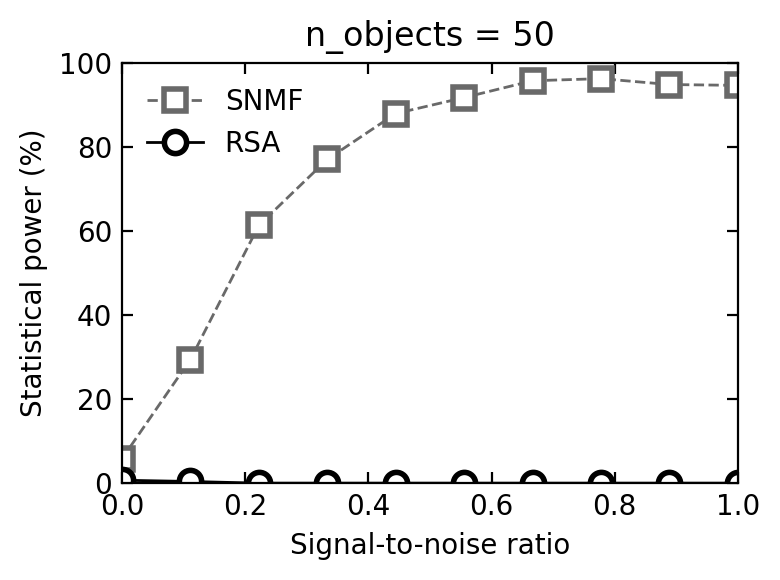

: 

In [ ]:
results_df = pd.read_csv("../results/rsa_comparison.csv")

power_df = (
    results_df.groupby(["snr", "method", "n_objects"])["significant"]
    .mean()
    .reset_index()
)
power_df["significant"] *= 100
# rename all methods named NMF to SNMF
power_df["method"] = power_df["method"].replace("NMF", "SNMF")

bw_colors = {
    "RSA": "black",
    "SNMF": "dimgray",
}
bw_styles = {
    "RSA": ("-", "o"),
    "SNMF": ("--", "s"),
}

for n_objects in sorted(power_df["n_objects"].unique()):
    plt.figure(figsize=(4, 3), dpi=200)

    subset_df = power_df[power_df["n_objects"] == n_objects]

    for method in subset_df["method"].unique():
        method_df = subset_df[subset_df["method"] == method]
        linestyle, marker = bw_styles.get(method, ("-", "o"))
        plt.plot(
            method_df["snr"],
            method_df["significant"],
            label=method,
            color=bw_colors.get(method, "black"),
            linestyle=linestyle,
            marker=marker,
            linewidth=1.0,
            markersize=8,
            markerfacecolor="white",
            markeredgewidth=2,
        )

    plt.xlabel("Signal-to-noise ratio", fontsize=10)
    plt.ylabel("Statistical power (%)", fontsize=10)
    plt.title(f"n_objects = {n_objects}", fontsize=12)
    plt.legend(fontsize=10, frameon=False)
    plt.xlim(0, subset_df["snr"].max())
    plt.ylim(0, 100)
    plt.tick_params(
        direction="in",
        top=True,
        right=True,
        which="both",
        labelsize=10,
        length=4,
    )
    plt.tight_layout()
